##  Author : Riasad Alvi
### 12 Jan 2025

In [5]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [8]:
# Importing the 'make_circles' function from sklearn.datasets module
from sklearn.datasets import make_circles

# Generating a dataset of 100 samples (n_samples=100) in the shape of two concentric circles
# Adding some random noise to the data points with noise=0.1 for variability
# Setting random_state=1 to ensure reproducibility (results are consistent every time the code is run)
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)




- `X`: Contains the coordinates of the points in a 2D space (features).
- `y`: Contains the labels for each point (0 for one circle, 1 for the other).


<Axes: >

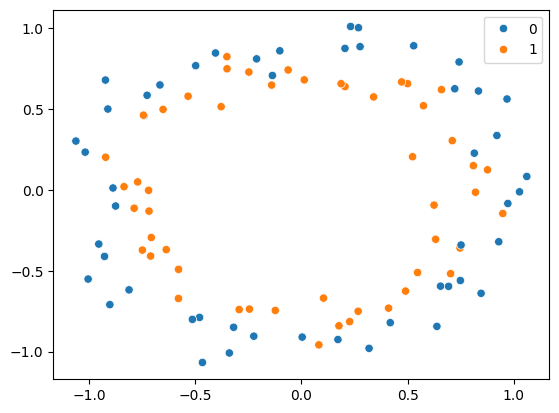

In [9]:
# Importing the seaborn library for visualization
import seaborn as sns

# Creating a scatter plot to visualize the dataset
# 'x=X[:,0]' selects the first column of the feature array 'X' (x-coordinates of points)
# 'y=X[:,1]' selects the second column of the feature array 'X' (y-coordinates of points)
# 'hue=y' colors the points based on their labels (0 or 1), making the two classes visually distinct
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)


In [11]:
# Importing the train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing subsets
# 'X' is the feature array, and 'y' is the label array
# 'test_size=0.20' specifies that 20% of the data will be allocated for testing, while 80% will be used for training
# 'random_state=2' ensures that the split is reproducible and consistent across runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)



### Outputs:
- `X_train`: Training set features (80% of the data).
- `X_test`: Testing set features (20% of the data).
- `y_train`: Training set labels corresponding to `X_train`.
- `y_test`: Testing set labels corresponding to `X_test`.

### Purpose:
This splits the data into two subsets: one for training a model and the other for evaluating its performance.

In [14]:
# Importing the Sequential model and Dense layer from the keras.models module
from keras.models import Sequential
from keras.layers import Dense

# Creating a sequential model to define the architecture of a neural network
model = Sequential()

# Adding the first layer (hidden layer)
# Dense(256): This layer has 256 neurons
# input_dim=2: The input has 2 features (X[:, 0] and X[:, 1], the x and y coordinates of the points)
# activation='relu': The Rectified Linear Unit (ReLU) activation function is used to introduce non-linearity
model.add(Dense(256, input_dim=2, activation='relu'))

# Adding the output layer
# Dense(1): This layer has 1 neuron (output for binary classification: 0 or 1)
# activation='sigmoid': The Sigmoid activation function outputs a probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))


In [15]:
# Compiling the model with specific configurations for training
model.compile(
    loss='binary_crossentropy',   # Specifies the loss function as binary cross-entropy, used for binary classification problems
    optimizer='adam',             # Specifies the optimizer as 'adam', an adaptive learning rate optimization algorithm
    metrics=['accuracy']          # Tracks 'accuracy' during training and evaluation as a performance metric
)


In [16]:
# Training the neural network model on the training data
history = model.fit(
    X_train,          # Input features for training
    y_train,          # Corresponding labels for training
    validation_data=(X_test, y_test),  # Validation set (features and labels) for monitoring performance during training
    epochs=3500,      # Number of complete passes over the entire training dataset
    verbose=0         # Suppresses output to make the training silent (no logs printed to the console)
)



### Explanation of Parameters:
1. **`X_train` and `y_train`**:  
   - The training dataset used to adjust the model's weights.

2. **`validation_data=(X_test, y_test)`**:  
   - The validation set used to evaluate the model's performance after each epoch.
   - Helps monitor overfitting by showing how well the model generalizes to unseen data.

3. **`epochs=3500`**:  
   - Specifies that the model will iterate 3,500 times over the training dataset during training.
   - Higher epochs allow the model more opportunities to learn, but excessive epochs may cause overfitting.

4. **`verbose=0`**:  
   - Prevents training logs from being printed to the console.
   - Other options:
     - `verbose=1`: Displays progress bars and performance metrics for each epoch.
     - `verbose=2`: Displays metrics in a more detailed but concise format.

### Output:
- `history`: An object that stores the training history, including:
  - Loss and accuracy for both training and validation sets after each epoch.
  - This data can be accessed later for analysis and visualization.

### Purpose:
This line trains the neural network using the training data and evaluates its performance on the validation set at each epoch. This helps optimize the model's weights for better performance.

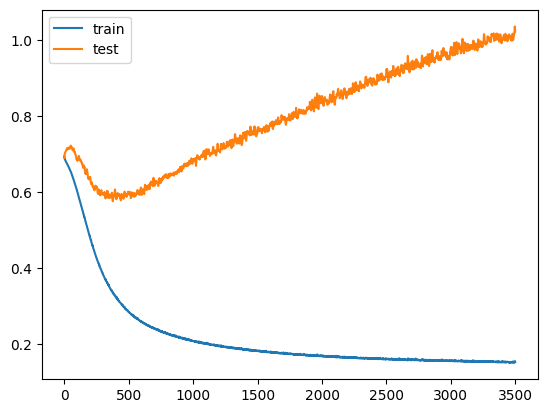

In [17]:
# Plotting the training and validation loss over epochs
plt.plot(history.history['loss'], label='train')       # Plot the training loss (stored in 'loss' key of history object)
plt.plot(history.history['val_loss'], label='test')    # Plot the validation loss (stored in 'val_loss' key of history object)

# Adding a legend to differentiate between the training and validation loss
plt.legend()

# Displaying the plot
plt.show()


## Overfitting occurs somewher around 300 epochs

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


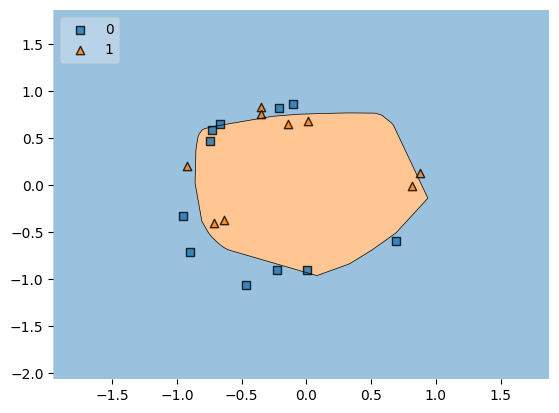

In [18]:
# Plotting the decision regions of the trained model on the test data
plot_decision_regions(
    X_test,           # Feature set (test data)
    y_test.ravel(),   # Labels (test data), flattened to a 1D array
    clf=model,        # The trained classifier (neural network model in this case)
    legend=2          # Adds a legend to the plot, positioned at the top right
)

# Displaying the decision region plot
plt.show()


# Heres How Early Stopping Selects how many Epoch required Automatically :

In [31]:
# Creating a new sequential model for a neural network
model = Sequential()

# Adding the first hidden layer
# Dense(256): This layer has 256 neurons
# input_dim=2: The input layer expects 2 features (x and y coordinates from the dataset)
# activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity
model.add(Dense(256, input_dim=2, activation='relu'))

# Adding the output layer
# Dense(1): This layer has 1 neuron (output node) for binary classification (0 or 1)
# activation='sigmoid': The Sigmoid activation function outputs a probability between 0 and 1, suitable for binary classification
model.add(Dense(1, activation='sigmoid'))


In [32]:
# Compiling the neural network model by specifying the loss function, optimizer, and metrics to track
model.compile(
    loss='binary_crossentropy',   # The loss function used for binary classification
    optimizer='adam',             # The optimizer used for updating model weights during training (Adam optimizer)
    metrics=['accuracy']          # The metric to track during training (accuracy in this case)
)


In [39]:
# Creating an EarlyStopping callback to stop training if the validation loss doesn't improve
callback = EarlyStopping(
    monitor="val_loss",         # Monitors the validation loss to decide when to stop training
    min_delta=0.00001,          # The minimum change in the monitored value (validation loss) to qualify as an improvement
    patience=30,                # Number of epochs to wait for an improvement before stopping
    verbose=1,                  # Enables verbose output, printing a message when early stopping is triggered
    mode="auto",                # Automatically chooses the best mode ('min' or 'max') based on the monitored value
    baseline=None,              # The baseline value to compare the monitored value against (None means no baseline)
    restore_best_weights=False  # Whether to restore the model weights from the epoch with the best value of the monitored quantity
)



### Purpose:
This **EarlyStopping** callback is used to prevent overfitting and save training time by stopping the training process if the model's performance on the validation set (validation loss) no longer improves for a specified number of epochs (`patience=20`). This helps avoid unnecessary computation when further training isn't likely to improve the model's performance.

In [40]:
# Training the model with the training data and validation data, including the early stopping callback
history = model.fit(
    X_train,                # Input features for the training data
    y_train,                # Corresponding labels for the training data
    validation_data=(X_test, y_test),  # Validation data to monitor performance during training
    epochs=3500,            # Number of epochs to train the model (3500 iterations over the entire dataset)
    callbacks=callback      # Passes the early stopping callback to stop training when the condition is met
)


Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5414 - loss: 0.6823 - val_accuracy: 0.4000 - val_loss: 0.7161
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5625 - loss: 0.6757 - val_accuracy: 0.4000 - val_loss: 0.7173
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5609 - loss: 0.6785 - val_accuracy: 0.4000 - val_loss: 0.7189
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5898 - loss: 0.6675 - val_accuracy: 0.4000 - val_loss: 0.7203
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5664 - loss: 0.6725 - val_accuracy: 0.4000 - val_loss: 0.7208
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5469 - loss: 0.6739 - val_accuracy: 0.4000 - val_loss: 0.7208
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5742 - loss: 0.6683 - val_accuracy: 0.4000 - val_loss: 0.7207
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5664 - loss: 0.6710 - val_accuracy: 0.4000 - v

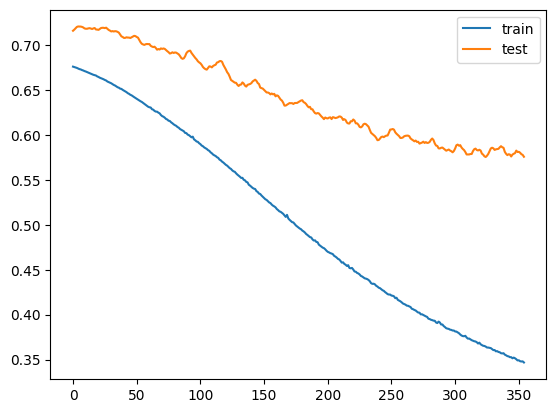

In [41]:
# Plotting the loss over epochs for both the training and validation sets
plt.plot(history.history['loss'], label='train')       # Plot the training loss from the 'history' object
plt.plot(history.history['val_loss'], label='test')    # Plot the validation loss from the 'history' object

# Adding a legend to the plot to label the training and test curves
plt.legend()

# Displaying the plot
plt.show()


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


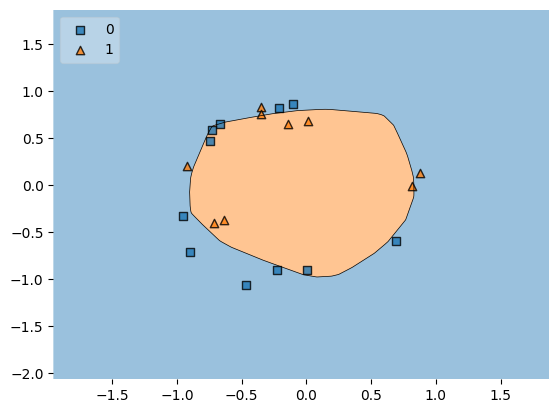

In [42]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()